[Sebastian Raschka](http://sebastianraschka.com), 2015

# Chapter 3 - A Tour of Machine Learning Classifiers Using Scikit-Learn
# 分類器大亂鬥 @@|||

### Overview

- Choosing a classification algorithm
- First steps with scikit-learn
- Training a perceptron via scikit-learn
- Logistic regression intuition and conditional probabilities
- Maximum margin classification with support vector machines
- Decision tree learning
- K-nearest neighbors – a lazy learning algorithm


In [4]:
from IPython.display import Image
%matplotlib inline

# Choosing a classification algorithm
- Selection of features.
- Choosing a performance metric.
- Choosing a classifier and optimization algorithm.
- Evaluating the performance of the model.
- Tuning the algorithm

# First steps with scikit-learn 整理資料

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [5]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target  # labels

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [8]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Standardizing the features:

In [9]:
#特徵標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)  # 對訓練集的每個特徵維度估計參數(sample mean)和標準差
X_train_std = sc.transform(X_train)  # 藉由transform()估計mean和標準差以標準化訓練集
X_test_std = sc.transform(X_test)

[標準化參考資料](http://scikit-learn.org/stable/modules/preprocessing.html)

In [10]:
print(X_train)

[[ 3.5  1. ]
 [ 5.5  1.8]
 [ 5.7  2.5]
 [ 5.   1.5]
 [ 5.8  1.8]
 [ 3.9  1.1]
 [ 6.1  2.3]
 [ 4.7  1.6]
 [ 3.8  1.1]
 [ 4.9  1.8]
 [ 5.1  1.5]
 [ 4.5  1.7]
 [ 5.   1.9]
 [ 4.7  1.4]
 [ 5.2  2. ]
 [ 4.5  1.6]
 [ 1.6  0.2]
 [ 5.1  1.9]
 [ 4.2  1.3]
 [ 3.6  1.3]
 [ 4.   1.3]
 [ 4.6  1.4]
 [ 6.   1.8]
 [ 1.5  0.2]
 [ 1.1  0.1]
 [ 5.3  1.9]
 [ 4.2  1.2]
 [ 1.7  0.2]
 [ 1.5  0.4]
 [ 4.9  1.5]
 [ 1.5  0.2]
 [ 5.1  1.8]
 [ 3.   1.1]
 [ 1.4  0.3]
 [ 4.5  1.5]
 [ 6.1  2.5]
 [ 4.2  1.3]
 [ 1.4  0.1]
 [ 5.9  2.1]
 [ 5.7  2.3]
 [ 5.8  2.2]
 [ 5.6  2.1]
 [ 1.6  0.2]
 [ 1.6  0.2]
 [ 5.1  2. ]
 [ 5.7  2.1]
 [ 1.3  0.3]
 [ 5.4  2.3]
 [ 1.4  0.2]
 [ 5.   2. ]
 [ 5.4  2.1]
 [ 1.3  0.2]
 [ 1.4  0.2]
 [ 5.8  1.6]
 [ 1.4  0.3]
 [ 1.3  0.2]
 [ 1.7  0.4]
 [ 4.   1.3]
 [ 5.9  2.3]
 [ 6.6  2.1]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.4  0.2]
 [ 4.5  1.3]
 [ 4.4  1.4]
 [ 1.2  0.2]
 [ 1.7  0.5]
 [ 4.3  1.3]
 [ 1.5  0.4]
 [ 6.9  2.3]
 [ 3.3  1. ]
 [ 6.4  2. ]
 [ 4.4  1.4]
 [ 1.5  0.1]
 [ 4.8  1.8]
 [ 1.2  0.2]
 [ 6.7  2. ]

In [11]:
print(X_train_std)

[[-0.18295039 -0.29145882]
 [ 0.93066067  0.73721938]
 [ 1.04202177  1.6373128 ]
 [ 0.6522579   0.35146505]
 [ 1.09770233  0.73721938]
 [ 0.03977182 -0.16287405]
 [ 1.26474398  1.38014325]
 [ 0.48521625  0.48004983]
 [-0.01590873 -0.16287405]
 [ 0.59657735  0.73721938]
 [ 0.70793846  0.35146505]
 [ 0.37385514  0.6086346 ]
 [ 0.6522579   0.86580415]
 [ 0.48521625  0.22288028]
 [ 0.76361901  0.99438893]
 [ 0.37385514  0.48004983]
 [-1.24088089 -1.32013702]
 [ 0.70793846  0.86580415]
 [ 0.20681348  0.0942955 ]
 [-0.12726983  0.0942955 ]
 [ 0.09545238  0.0942955 ]
 [ 0.42953569  0.22288028]
 [ 1.20906343  0.73721938]
 [-1.29656144 -1.32013702]
 [-1.51928365 -1.4487218 ]
 [ 0.81929956  0.86580415]
 [ 0.20681348 -0.03428927]
 [-1.18520034 -1.32013702]
 [-1.29656144 -1.06296747]
 [ 0.59657735  0.35146505]
 [-1.29656144 -1.32013702]
 [ 0.70793846  0.73721938]
 [-0.46135315 -0.16287405]
 [-1.35224199 -1.19155225]
 [ 0.37385514  0.35146505]
 [ 1.26474398  1.6373128 ]
 [ 0.20681348  0.0942955 ]
 

## Training a perceptron via scikit-learn 感知器

Redefining the `plot_decision_region` function from chapter 2:

In [12]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0) # random_state參數:對每輪處理之後，訓練集位置的擾亂
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [13]:
y_test.shape  #y_test中有幾筆

(45,)

In [14]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())  #列印出有幾筆不符合預測的資料

Misclassified samples: 4


In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# 準確率：41/45=0.91; y_test是真正的label，y_pred是之前所預測的label

Accuracy: 0.91


In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))

# 用plot_decision_regions()繪出“決策區域圖”
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

[matplotlib marker](http://matplotlib.org/api/markers_api.html)

Training a perceptron model using the standardized training data:

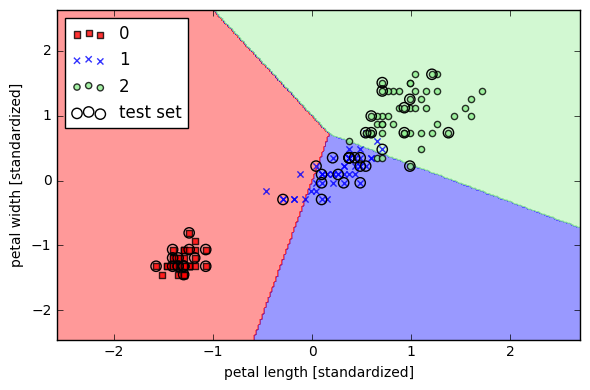

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)  #存圖
plt.show()

# Modeling class probabilities via logistic regression 羅吉斯迴歸=>類別機率

### Logistic regression intuition and conditional probabilities

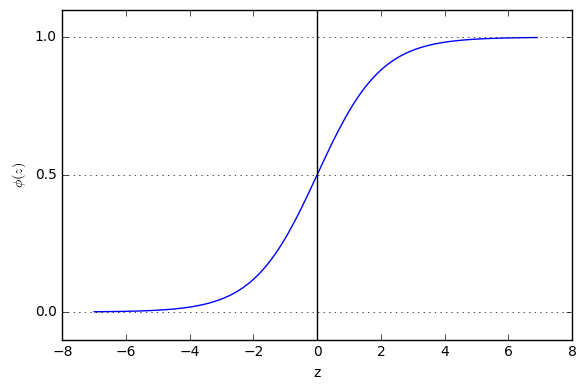

In [19]:
# Logistic迴歸是分類模型，無關於迴歸
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

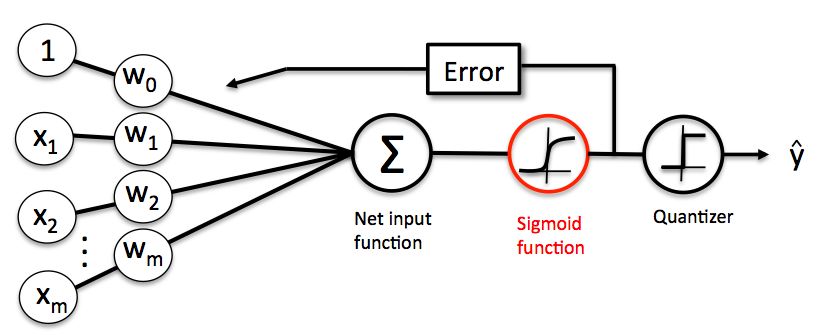

In [20]:
Image(filename='./images/03_03.png', width=500) 

### Training a logistic regression model with scikit-learn

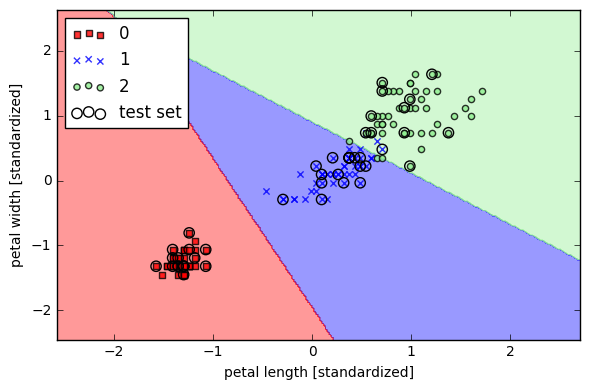

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [27]:
lr.predict_proba(X_test_std[0,:])  # predict_proba()為Logistic特有的函式
# 預測各類別的機率
# 例如：以array()傳回iris-Versicolor的機率為0.063，而iris-Virginica的機率為0.93

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

# Maximum margin classification with support vector machines (SVM)

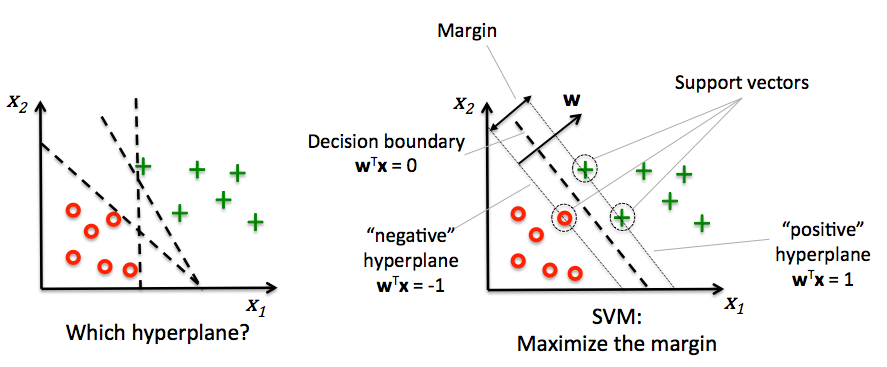

In [28]:
Image(filename='./images/03_07.png', width=700) 

## Maximum margin intuition

## Dealing with the nonlinearly separable case using slack variables

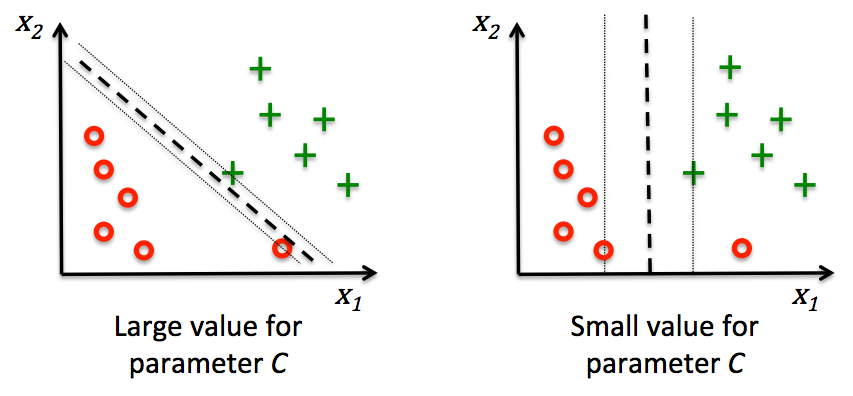

In [29]:
Image(filename='./images/03_08.png', width=600) 

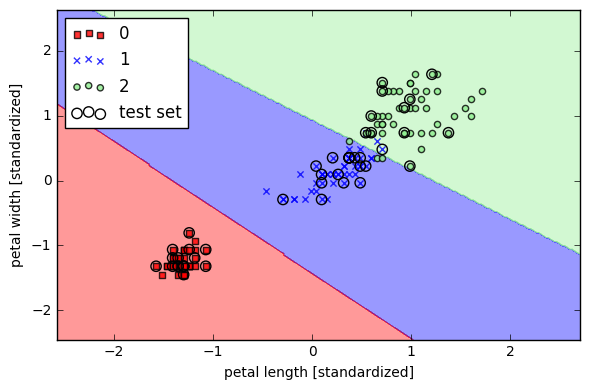

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

# Solving non-linear problems using a kernel SVM

## Using the kernel trick to find separating hyperplanes in higher dimensional space

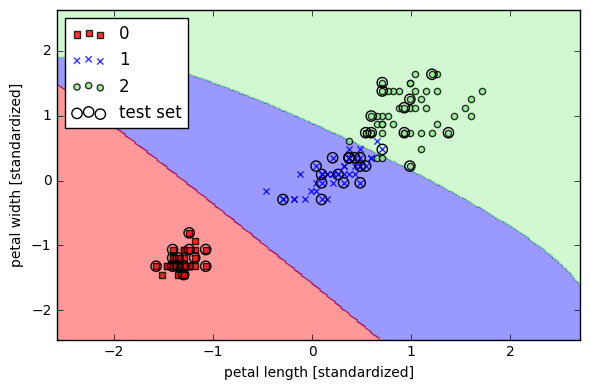

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()

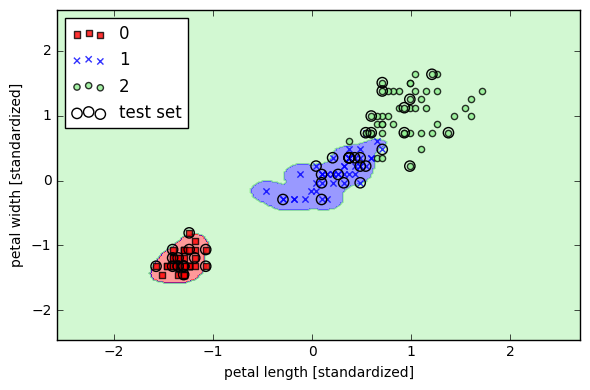

In [25]:
svm = SVC(kernel='rbf', random_state=0, gamma=50.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_2.png', dpi=300)
plt.show()

## 結論：非線性SVM雖然有良好的預測能力，但可能存在overfitting的風險

# Decision tree learning

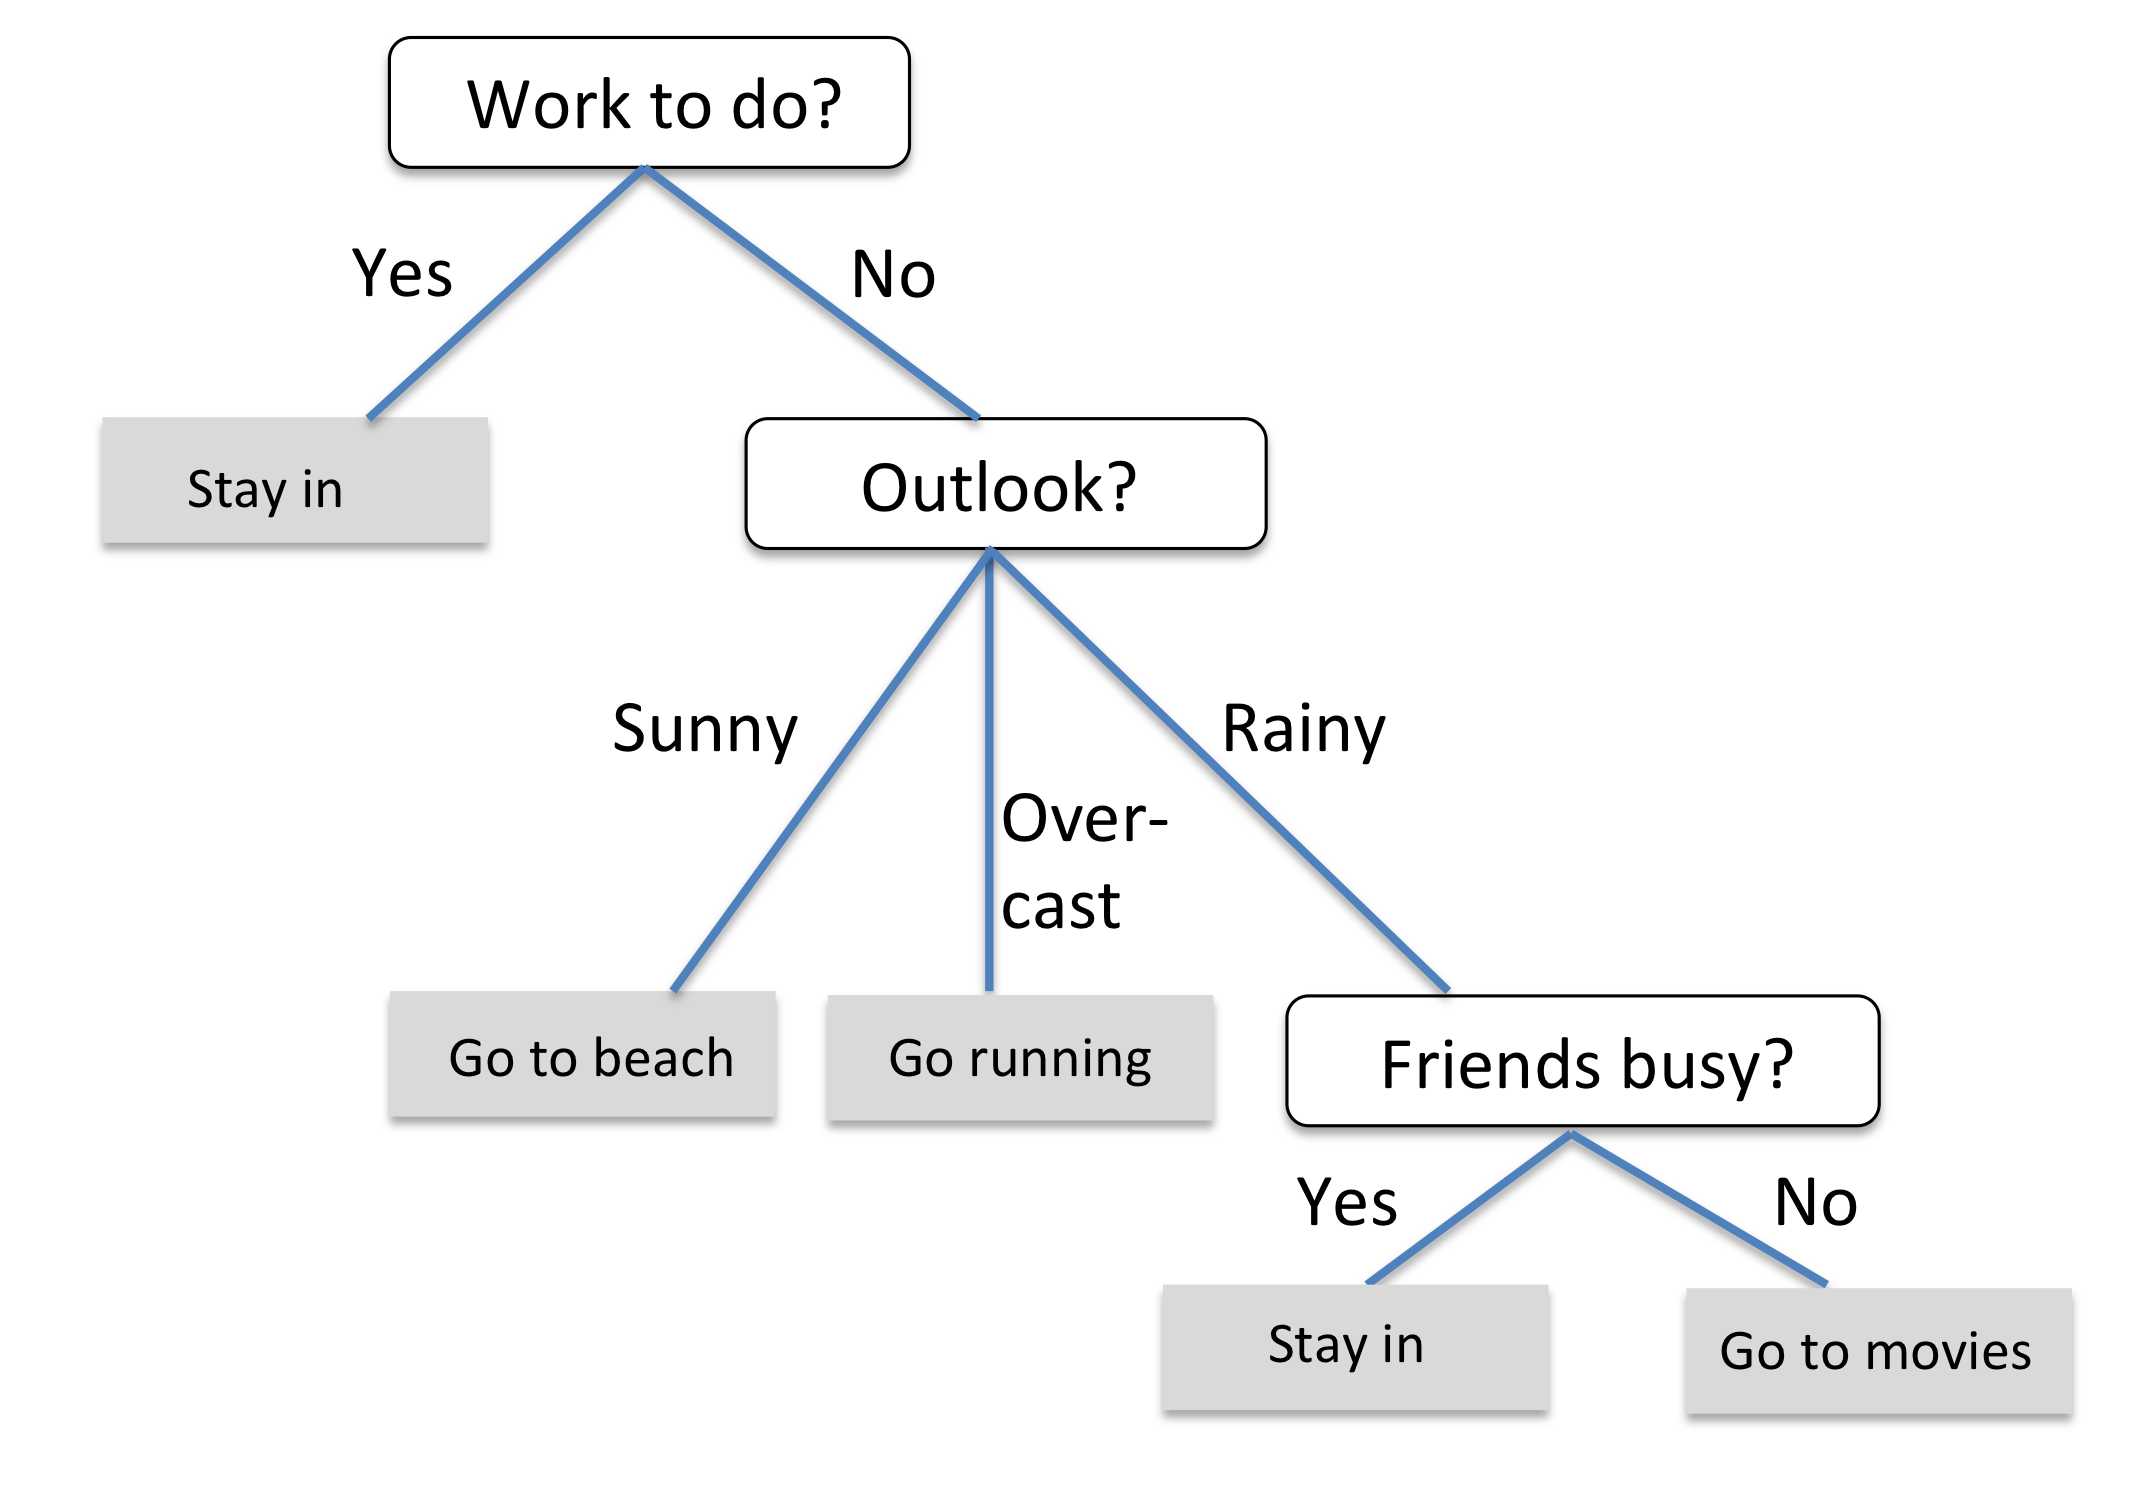

In [26]:
Image(filename='./images/03_15.png', width=500) 

## Building a decision tree

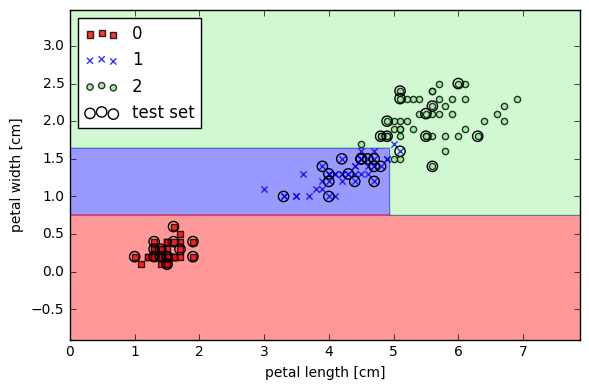

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

In [30]:
from sklearn.tree import export_graphviz

# 輸出tree.dot檔案在工作目錄層
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

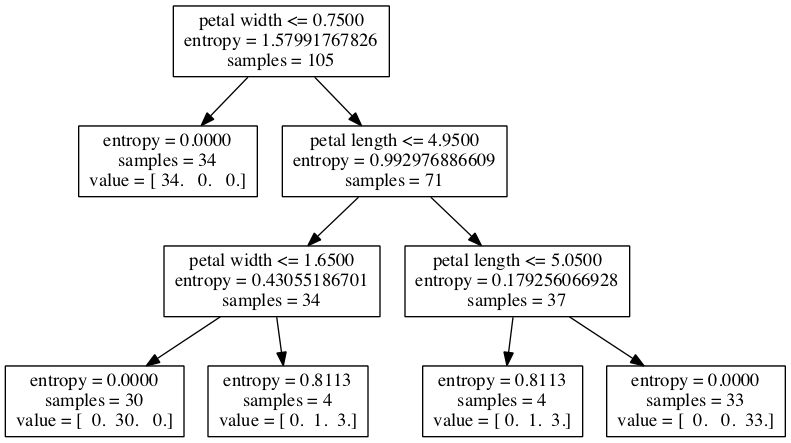

In [31]:
Image(filename='./images/03_18.png', width=600) 
#安裝GraphViz，執行 dot -Tpng tree.dot -o tree.png

## Combining weak to strong learners via random forests 隨機森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

# K-nearest neighbors - a lazy learning algorithm

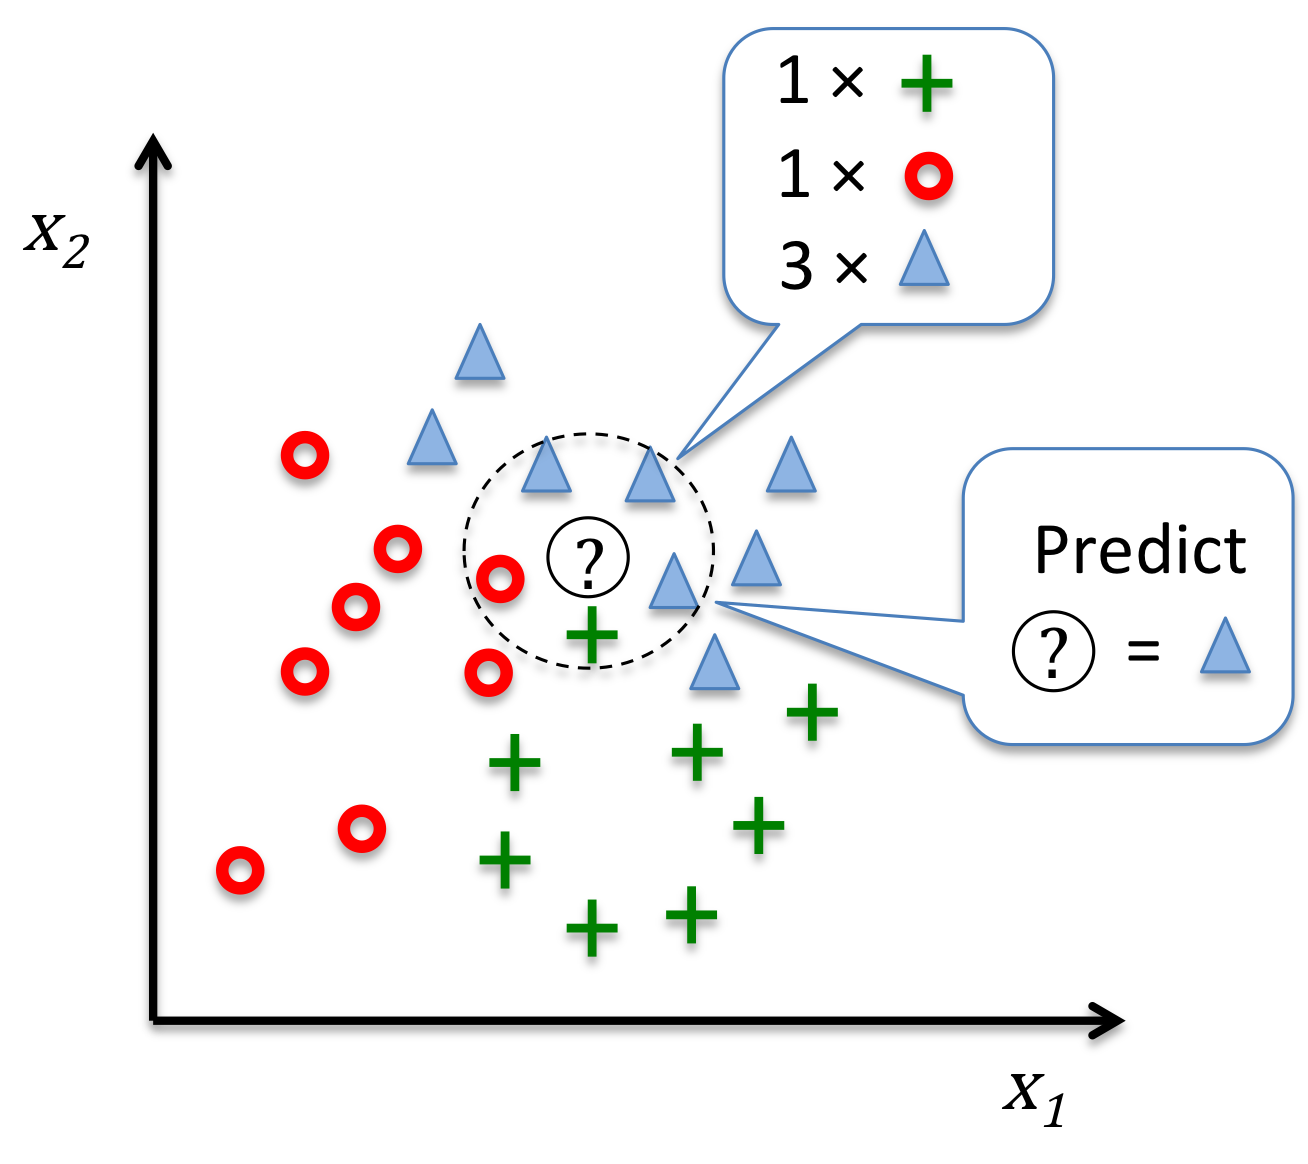

In [31]:
Image(filename='./images/03_20.png', width=400) 

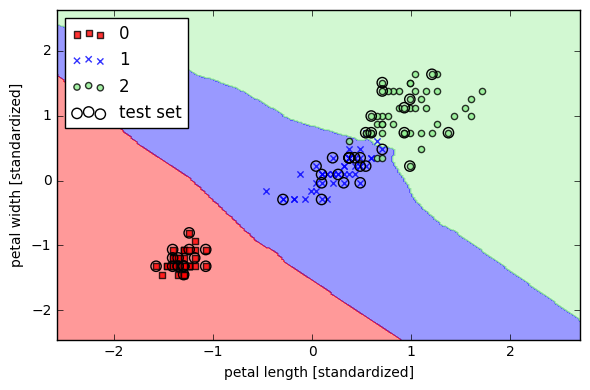

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()